 <center> <h1> <b> Pattern Recognition and Machine Learning (EE5610 - EE2802 - AI2000 - AI5000) </b> </h1> </center>

<b> Programming Assignment - 04 : Neural Networks </b>


This programming assignment gives you a chance to perform the classification task using neural networks. You will get to build a neural network from scratch and train and test it on a standard classification dataset. Further you will learn different tricks and techniques to train a neural network eficiently by observing few important issues and trying to overcome them. This includes observing the performance of the network for different activation functions and optimization algorithms. We will conclude with implementation of various regularization techniques to overcome the problems of overfitting and vanishing gradients.

<b> Instructions </b>
1. Plagiarism is strictly prohibited.
2. Delayed submissions will be penalized with a scaling factor of 0.5 per day.
3. Please DO NOT use any machine learning libraries unless and otherwise specified.








<b>  Part - (1) : Develop a neural network based classification network from scratch: </b>  This programming assignment uses MNIST digit dataset. It consists of large collection of handwritten digits from 0 to 9. These images are formated as 28x28 pixel gray scale images. The objective of this programming assignment is to design a neural network architecture that takes input as 28x28 image (or 784 dimensional vector) as input and predicts the digit information in it. Although there are diffrent varieties of neural network architecture to solve this task, this programming assignment uses only the feed forward network.  

<dt> <h6> 1. Load MNIST data and create train, test splits </dt> </h6>

<dd> <h6> - The MNIST dataset consists of around 70,000 images. Divide the dataset into two segments: training and testing. Allocate 60,000 images for training and 10,000 images for testing
</dd> </h6>
<dd> <h6> - Code for downloading the data and creating train-test splits is provided </dd> </h6>

<dt> <h6> 2. Design a simple classification network </dt> </h6>

<dd> <h6> - Let us use three layer feed-forward neral network. Use 512 nodes in the hidden layers and 10 nodes in the output layer. The output $\textbf{y}$ from the input $\textbf{x}$ is computed as follows </dd> </h6>
<dd> <h6> <center> $ \textbf{y} = h(\textbf{W}_{3}g(\textbf{W}_{2}g(\textbf{W}_{1}\textbf{x}))) $ </center> </dd> </h6>
<dd> <h6> where $\textbf{W}_{1} \in \mathcal{R}^{512 \times 768}$,$\textbf{W}_{2} \in \mathcal{R}^{512 \times 512}$,$\textbf{W}_{3} \in \mathcal{R}^{10 \times 512} $ are the parameters of the network. g(.) is the hidden layer activation function. h(.) is the output layer activation function   </dd> </h6>
<dd> <h6> - Consider g(.) as ReLU activation function. Softmax activation function should be used at the last layer h(.), to get the posterior probability of the classes. </dd> </h6>

<dt> <h6> - Training classification network: </dt> </h6>

<dd> <h6>  - Flatten the 28x28 images to arrive at 784 dimensional vector.  </dd> </h6>  
<dd> <h6> - Randomly initialize the parameters of network, $\textbf{W}_{1} \in \mathcal{R}^{768 \times 512}$,$\textbf{W}_{2} \in \mathcal{R}^{512 \times 512}$,$\textbf{W}_{3} \in \mathcal{R}^{512 \times 10}$  </dd> </h6>
<dd> <h6> - Feedforward the batch of input vectors to get the posterior probability of classes.  </dd> </h6>
<dd> <h6> - Compute the loss between the estimated posterior probabilities and the true targets. </dd> </h6>  
<dd> <h6> - Update the parameters of network to minimize the loss function.  </dd> </h6>
<dd> <h6> <dd> <h6> - Backpropagate the loss function to get the gradients.  </dd> </h6> </dd> </h6>  

<dd> <h6> <dd> <h6> - You can use stochastic gradient descent (SGD) optimization algorithm to update the parameters.  </dd> </h6> </dd> </h6>  
<dd> <h6> <dd> <h6> - Cleverly set the hyperparameters involved in this optimization process. </dd> </h6> </dd> </h6>

<dt> <h6> 3. Evaluate the performance of classification network </dd> </h6>
<dd> <h6> - feed-forward the MNIST data through the trained classification network to get class posteriors. </dd> </h6>  
<dd> <h6> - Assign the input to the class having maximum posterior probability </dd> </h6>  
<dd> <h6> - Compute the loss and accuaracy </dd> </h6>  
<dd> <h6> - Report your observations </dd> </h6>  





In [ ]:
#All imports
import numpy as np
from mpl_toolkits.mplot3d import Axes3D
import matplotlib.pyplot as plt
import collections

In [ ]:
##################################################
#Load MNIST data.
##################################################
import torchvision.datasets as datasets
mnist_trainset = datasets.MNIST(root='./data', train=True, download=True, transform=None)
mnist_testset = datasets.MNIST(root='./data', train=False, download=True, transform=None)

#Training data
mnist_traindata = mnist_trainset.data.numpy()
mnist_trainlabel = mnist_trainset.targets.numpy()
mnist_traindata = mnist_traindata.reshape(60000,-1)
print("Training data",mnist_traindata.shape)
print("Training labels",mnist_trainlabel.shape)

#Testing data
mnist_testdata = mnist_testset.data.numpy()
mnist_testlabel = mnist_testset.targets.numpy()
mnist_testdata = mnist_testdata.reshape(10000,-1)
print("Testing data",mnist_testdata.shape)
print("Testing labels",mnist_testlabel.shape)

Failed to download (trying next):
HTTP Error 403: Forbidden



100%|██████████| 9912422/9912422 [00:00<00:00, 16276262.76it/s]


Extracting ./data/MNIST/raw/train-images-idx3-ubyte.gz to ./data/MNIST/raw

Failed to download (trying next):
HTTP Error 403: Forbidden



100%|██████████| 28881/28881 [00:00<00:00, 500815.26it/s]


Extracting ./data/MNIST/raw/train-labels-idx1-ubyte.gz to ./data/MNIST/raw

Failed to download (trying next):
HTTP Error 403: Forbidden



100%|██████████| 1648877/1648877 [00:00<00:00, 4472816.60it/s]


Extracting ./data/MNIST/raw/t10k-images-idx3-ubyte.gz to ./data/MNIST/raw

Failed to download (trying next):
HTTP Error 403: Forbidden



100%|██████████| 4542/4542 [00:00<00:00, 2149444.74it/s]

Extracting ./data/MNIST/raw/t10k-labels-idx1-ubyte.gz to ./data/MNIST/raw

Training data (60000, 784)
Training labels (60000,)
Testing data (10000, 784)
Testing labels (10000,)


In [ ]:
##################################################
#Define the architecture
##################################################

#Complete the below function to impliment ReLU activation function
def ReLu(inp):
  outp = np.maximum(0,inp)
  return outp
#Complete the below function to impliment gradient of ReLU activation function
def gradReLu(inp):
  outp = np.where(inp > 0, 1,0)
  return outp

#Complete the below function to impliment softmax activation function
def softmax(inp):
  if len(inp):
    outp = np.exp(inp - np.max(inp)) / np.sum(np.exp(inp - np.max(inp)))
    return outp

#Complete the below function to impliment forward propagation of data
def fwdPropagate(inputs, weights,activation_fun = ReLu):
  #Inputs: input data, paramters of network
  W1, W2, W3 = weights
  z1 = inputs @ W1.T
  a = activation_fun(z1)

  z2 = a @ W2.T
  a = activation_fun(z2)

  z3 = a @ W3.T
  targets = softmax(z3)

  activations = (z1,z2)
  outps = (targets, activations)
  #Return the requires outputs, i.e., final output and intermediate activations
  return outps

#Complete the below function to compute the gradients
def computeGradients(inputs, targets, weights, activations,grad_activation_fun = gradReLu):
  #Inputs: input data, targets, parameters of netwrok, intermediate activations

  #Compute the loss
  z1,z2 = activations
  W1,W2,W3 = weights
  predictions = []
  for z in z2:
    a = W3 @ z
    y = softmax(a)
    predictions.append(y)

  predictions = np.array(predictions)

  dj_dw3 = np.zeros_like(W3)
  dj_dw2 = np.zeros_like(W2)
  dj_dw1 = np.zeros_like(W1)

  m = len(inputs)
  if len(predictions):
    #loss = -np.sum(np.log(predictions[np.arange(len(inputs)),targets])) / len(inputs)
    #Compote the derivative of loss at parameters
    delta3 = predictions - targets
    dj_dw3 = np.dot(delta3.T, z2) / m
    delta2 = np.dot(delta3, W3) * grad_activation_fun(z2)
    dj_dw2 = np.dot(delta2.T, z1) / m
    delta1 = np.dot(delta2, W2) * grad_activation_fun(z1)
    dj_dw1 = np.dot(delta1.T, inputs.reshape(-1, 784)) / m

  #Return the gradients
  return [dj_dw1, dj_dw2, dj_dw3]

#Complete the below function to update the parameters using the above computed gradients
def applyGradients(weights, gradients, learning_rate, adam = False):
  #Inputs: weights, gradients, and learning rate
  W1, W2, W3 = weights
  dj_dw1, dj_dw2, dj_dw3 = gradients

  if adam:
    beta1 = 0.9
    beta2 = 0.999
    epsilon = 1e-8
    t = 1
    m1 = np.zeros_like(W1)
    v1 = np.zeros_like(W1)
    m2 = np.zeros_like(W2)
    v2 = np.zeros_like(W2)
    m3 = np.zeros_like(W3)
    v3 = np.zeros_like(W3)

    m1 = beta1 * m1 + (1 - beta1) * dj_dw1
    v1 = beta2 * v1 + (1 - beta2) * (dj_dw1 ** 2)
    m2 = beta1 * m2 + (1 - beta1) * dj_dw2
    v2 = beta2 * v2 + (1 - beta2) * (dj_dw2 ** 2)
    m3 = beta1 * m3 + (1 - beta1) * dj_dw3
    v3 = beta2 * v3 + (1 - beta2) * (dj_dw3 ** 2)

    m1_hat = m1 / (1 - beta1 ** t)
    v1_hat = v1 / (1 - beta2 ** t)
    m2_hat = m2 / (1 - beta1 ** t)
    v2_hat = v2 / (1 - beta2 ** t)
    m3_hat = m3 / (1 - beta1 ** t)
    v3_hat = v3 / (1 - beta2 ** t)

    W1 -= learning_rate * m1_hat / (np.sqrt(v1_hat) + epsilon)
    W2 -= learning_rate * m2_hat / (np.sqrt(v2_hat) + epsilon)
    W3 -= learning_rate * m3_hat / (np.sqrt(v3_hat) + epsilon)

    return [W1, W2, W3]

  W1 -= learning_rate*dj_dw1
  W2 -= learning_rate*dj_dw2
  W3 -= learning_rate*dj_dw3

  #Return the updated parameters
  return [W1, W2, W3]

#Complete the below function to complete the backpropagation ste
def backPropagate(inputs, targets, weights, activations, learning_rate,grad_activation_fun = gradReLu,adam = False):
  #Inputs: input data, targets, parameters of network, intermediate activations, learning rate of optimization algorithm

  #Compute the gradients
  gradients = computeGradients(inputs,targets,weights,activations,grad_activation_fun)
  #Update the paramters using gradients
  weights = applyGradients(weights,gradients,learning_rate,adam)
  #Return the updated parameters
  return weights

##################################################
#Train the network
##################################################

#Complete the below function to complete the training of network
def training(inputs, targets_idx,activation_fun = ReLu,grad_activation_fun = gradReLu ,adam = False,batch_size = 128, epochs=30, train_val_split=0.8, learning_rate=0.0001):

  #Set the hyperparameters
  hidden_units = 512
  n_classes = 10
  n_samples = len(inputs)
  n_batches = n_samples // batch_size

  #Split the training data into two parts.
  #Use 90 percent of training data for training the network.
  #Remaining 10 percent as validation data
  index = int(train_val_split*n_samples)
  training_data = inputs[:index]
  training_targets = targets_idx[:index]
  validation_data = inputs[index:]
  validation_targets = targets_idx[index:]

  #Randomly initialize the weights
  W1 = np.random.randn(hidden_units,inputs.shape[1])*0.001
  W2 = np.random.randn(hidden_units, hidden_units)*0.001
  W3 = np.random.randn(n_classes,hidden_units)*0.001
  weights = [W1,W2,W3]
  #Interate for epochs times
  for epoch in range(epochs):
    #Shuffle the training data
    permutation = np.random.permutation(training_data.shape[0])
    train_data_shuffled = training_data[permutation]
    train_targets_shuffled = training_targets[permutation]

    #Interate through the batches of data
    for batch in range(n_batches + 1):
      #Get the batch of data
      start = batch*batch_size
      end = min(start + batch_size, n_samples)
      batch_inputs = train_data_shuffled[start:end]
      batch_targets = train_targets_shuffled[start:end]

      #Forward propagation
      predictions,activations = fwdPropagate(batch_inputs, weights, activation_fun)

      #Backward propagation
      weights = backPropagate(batch_inputs, batch_targets, weights, activations, learning_rate, grad_activation_fun, adam)

    #Compute outpus on trianing data
    predictions,_ = fwdPropagate(training_data,weights)
    train_predictions = np.argmax(predictions,axis = 1)
    #Compute training accuracy, and training error
    train_accuracy = np.mean(train_predictions == np.argmax(training_targets,axis = 1))
    train_loss = -np.sum(training_targets * np.log(predictions + 1e-5)) / len(training_data)

    #Compute outputs on validation data
    val_outputs, _ = fwdPropagate(validation_data, weights)
    val_predictions = np.argmax(val_outputs, axis=1)
    #Compute validation accuracy, and validation error
    val_accuracy = np.mean(val_predictions == np.argmax(validation_targets, axis = 1))
    val_loss = -np.sum(validation_targets * np.log(val_outputs + 1e-5)) /  len(validation_data)

    #Print the statistics of training, i.e., training error, training accuracy, validation error, and validation accuracy
    print(f"Epoch {epoch + 1}/{epochs}:")
    print(f"  Training Loss: {train_loss:.4f} - Training Accuracy: {train_accuracy:.4f}")
    print(f"  Validation Loss: {val_loss:.4f} - Validation Accuracy: {val_accuracy:.4f}")

    #Save the parameters of network
  return weights
#Call the training function to train the network
targets = np.eye(10)[mnist_trainlabel]
weights = training(mnist_traindata,targets)

##################################################
#Evaluate the performance on test data
##################################################
outputs,_ = fwdPropagate(mnist_testdata, weights)
outputs = np.argmax(outputs, axis = 1)
test_accuracy = np.mean(outputs == mnist_testlabel)
print("Test accuracy : ", test_accuracy)

Epoch 1/30:
  Training Loss: 11.3201 - Training Accuracy: 0.3794
  Validation Loss: 10.8973 - Validation Accuracy: 0.3891
Epoch 2/30:
  Training Loss: 11.2453 - Training Accuracy: 0.7264
  Validation Loss: 10.8983 - Validation Accuracy: 0.7452
Epoch 3/30:
  Training Loss: 11.4065 - Training Accuracy: 0.8415
  Validation Loss: 11.2722 - Validation Accuracy: 0.8544
Epoch 4/30:
  Training Loss: 11.3928 - Training Accuracy: 0.8762
  Validation Loss: 11.2403 - Validation Accuracy: 0.8838
Epoch 5/30:
  Training Loss: 11.3746 - Training Accuracy: 0.8919
  Validation Loss: 11.2364 - Validation Accuracy: 0.8986
Epoch 6/30:
  Training Loss: 11.3821 - Training Accuracy: 0.8997
  Validation Loss: 11.2661 - Validation Accuracy: 0.9045
Epoch 7/30:
  Training Loss: 11.3939 - Training Accuracy: 0.9089
  Validation Loss: 11.3127 - Validation Accuracy: 0.9148
Epoch 8/30:
  Training Loss: 11.3674 - Training Accuracy: 0.9139
  Validation Loss: 11.3032 - Validation Accuracy: 0.9179
Epoch 9/30:
  Training L

<b> Report your observations </b>

1.It can be observed that with every epoch, the accuracy is increasing, achieves a peak and then decreases.

2.The accuracy for the validation set also behaves the same way.

3.The training loss is greater than validation loss



<b> Part - (2) : Understanding activation functions: </b> In this part you will learn to use different activation functions for the classification task and compare their performances.

<dt> <h6> 1. Train MNIST digit classification network with different activation functions i.e. Sigmoid, Tanh, ReLU, LeakyReLU etc. You can stick to stochastic gradient descent optimization algorithm for this part </dt> </h6>
<dt> <h6> 2. Report the accuray on MNIST test data for all the experiments. Write down your observations in the report.</br> </dt> </h6>



In [ ]:
##################################################
#Train the network with different activation functions
##################################################
def sigmoid(inp):
  return 1 / (1 + np.exp(-inp))

def grad_sigmoid(inp):
  a = sigmoid(inp)
  return a*(1 - a)

def tanh(inp):
  return (np.exp(2*inp) - 1) / (np.exp(2*inp) + 1)

def grad_tanh(inp):
  a = tanh(inp)
  return 1 - (a**2)

def LeakyReLu(inp,alpha = 0.01):
  return np.where(inp > 0, inp, alpha*inp)

def grad_LeakyReLu(inp, alpha = 0.01):
  return np.where(inp > 0, 1, alpha)

print("Sigmoid: ")
weights_sigmoid = training(mnist_traindata,targets,sigmoid,grad_sigmoid)

print("Tanh: ")
weights_tanh = training(mnist_traindata,targets,tanh,grad_tanh)

print("LeakyReLu: ")
weights_LR = training(mnist_traindata,targets,LeakyReLu,grad_LeakyReLu)

##################################################
#Evaluate the performance on MNIST test data
##################################################
print("Test accuracy for ReLu as activation: ", test_accuracy)

outputs,_ = fwdPropagate(mnist_testdata, weights_sigmoid)
outputs = np.argmax(outputs, axis = 1)
test_accuracy = np.mean(outputs == mnist_testlabel)
print("Test accuracy for sigmoid as activation: ", test_accuracy)

outputs,_ = fwdPropagate(mnist_testdata, weights_tanh)
outputs = np.argmax(outputs, axis = 1)
test_accuracy = np.mean(outputs == mnist_testlabel)
print("Test accuracy for tanh as activation : ", test_accuracy)

outputs,_ = fwdPropagate(mnist_testdata, weights_LR)
outputs = np.argmax(outputs, axis = 1)
test_accuracy = np.mean(outputs == mnist_testlabel)
print("Test accuracy for LeakyReLu as activation: ", test_accuracy)

Sigmoid: 
Epoch 1/30:
  Training Loss: 11.3236 - Training Accuracy: 0.4235
  Validation Loss: 10.9065 - Validation Accuracy: 0.4243
Epoch 2/30:
  Training Loss: 11.3234 - Training Accuracy: 0.5599
  Validation Loss: 10.9061 - Validation Accuracy: 0.5697
Epoch 3/30:
  Training Loss: 11.3232 - Training Accuracy: 0.6058
  Validation Loss: 10.9055 - Validation Accuracy: 0.6205
Epoch 4/30:
  Training Loss: 11.3228 - Training Accuracy: 0.6075
  Validation Loss: 10.9045 - Validation Accuracy: 0.6213
Epoch 5/30:
  Training Loss: 11.3221 - Training Accuracy: 0.5750
  Validation Loss: 10.9027 - Validation Accuracy: 0.5903
Epoch 6/30:
  Training Loss: 11.3205 - Training Accuracy: 0.5165
  Validation Loss: 10.8984 - Validation Accuracy: 0.5253
Epoch 7/30:
  Training Loss: 11.3155 - Training Accuracy: 0.4349
  Validation Loss: 10.8854 - Validation Accuracy: 0.4412
Epoch 8/30:
  Training Loss: 11.2938 - Training Accuracy: 0.3508
  Validation Loss: 10.8318 - Validation Accuracy: 0.3473
Epoch 9/30:
  

<b> Report your observations </b>

1.it can bee observed that the, the training and validation accuracy increases with epochs for all of the activation functions.

2.The performance of model when ReLu and LeakyReLu is used as activation function, is better than that of sigmoid and tanh functions taken as activation functions

3.Overall accuracy in case of LeakyReLu and ReLu is quite similar. However, the accuracy in case of LeakyReLu is slightly greater than ReLu



<b> Part - (3) : Understanding optimization algorithms: </b> In this part you will learn to use different optimiztion algorithm apart from SGD.

<dt> <h6> 1. Using the best activation function from Part - (2), train the classification network using Adam optimization algorithm. </dt> </h6>
<dt> <h6> 3. Compare the accuracy of the networks trained with SGD and Adam optimization algorithms. </dt> </h6>
<dt> <h6> 4. Report your observations. </dt> </h6>

In [ ]:
##################################################
#Train the network using Adam optimizer
##################################################
weights = training(mnist_traindata,targets,LeakyReLu,grad_LeakyReLu,True,learning_rate = 0.00001)

##################################################
#Compare the accuracies and report your observations
##################################################
print("Test accuracy for LeakyReLu as activation using SGD: ", test_accuracy)

outputs,_ = fwdPropagate(mnist_testdata, weights)
outputs = np.argmax(outputs, axis = 1)
test_accuracy = np.mean(outputs == mnist_testlabel)
print("Test accuracy for LeakyReLu as activation using Adam's Algorithm: ", test_accuracy)


Epoch 1/30:
  Training Loss: 10.9826 - Training Accuracy: 0.7878
  Validation Loss: 10.3963 - Validation Accuracy: 0.8056
Epoch 2/30:
  Training Loss: 11.1931 - Training Accuracy: 0.8647
  Validation Loss: 10.8090 - Validation Accuracy: 0.8725
Epoch 3/30:
  Training Loss: 11.1991 - Training Accuracy: 0.8846
  Validation Loss: 10.8718 - Validation Accuracy: 0.8952
Epoch 4/30:
  Training Loss: 11.1864 - Training Accuracy: 0.8967
  Validation Loss: 10.8806 - Validation Accuracy: 0.9031
Epoch 5/30:
  Training Loss: 11.1995 - Training Accuracy: 0.9019
  Validation Loss: 10.9113 - Validation Accuracy: 0.9061
Epoch 6/30:
  Training Loss: 11.2014 - Training Accuracy: 0.9055
  Validation Loss: 10.8774 - Validation Accuracy: 0.9102
Epoch 7/30:
  Training Loss: 11.2011 - Training Accuracy: 0.9120
  Validation Loss: 10.8549 - Validation Accuracy: 0.9166
Epoch 8/30:
  Training Loss: 11.2561 - Training Accuracy: 0.9156
  Validation Loss: 10.9414 - Validation Accuracy: 0.9198
Epoch 9/30:
  Training L

<b> Report your observations </b>

1.In case of Adam's Algorithm, the accuracy increases, attains a peak and then decreases due to overfitting.

2.The accuracy in case of SGD is higher than that of Adam's algorithm.

3.If the learning rate is kept small,Adam's Algorithm would perform better than SGD



<b> Part - (4) : Understanding regularization methods: </b> In this part of the assignment, you will learn about a few regularization techniques to reduce the overfitting problem. Using the above built network, include the following techniques to reduce the overfitting by retraining the network efficiently. Write down the accuracies for each case.
<dt> <h6> 1. Weight regularization: Add regularization term to the classification los </dt> </h6>
<dt> <h6> 2. Dropout with a probability of 0.2: Randomly drop the activation potentials of hidden neural with 0.2 probability. Disable the dropout layer in inference model. You can experiment with different dropout probabilities and report your observations.  </dt> </h6>
<dt> <h6> 3. Early stopping: Stop the network training when it is started to overfitting to training data. </dt> </h6>


In [ ]:
##################################################
#Training with weight regularization
##################################################








##################################################
#Training with dropout strategy
##################################################







##################################################
#Training with early stopping criterion
##################################################









<b> Report your observations </b>

1.

2.

3.



<b> Part - (5) : Comparision with linear classifiers: </b> In this part of the assignment, you will compare the performance of deep neural network based classification models with the linear classification models. You will be provided with codes to generate two types of binary classification data. First type of data is linearly separabble. The second type of data is not linearly separable. You have to classify these two types of data bases using both deep neural network models and linear classification models.

<dt> <h6> 1. Linearly separable data: Consider a classification scenario with two classes. Class 1 follows a Gaussian distribution with a mean vector $\begin{bmatrix} 1  \\ 1  \end{bmatrix}$ and a covariance matrix $\begin{bmatrix} 0.3 & 0.0  \\ 0.0 & 0.3 \end{bmatrix}$. Class 2 follows a Gaussian distribution with a mean vector $\begin{bmatrix} 3  \\ 3  \end{bmatrix}$ and a covariance matrix $\begin{bmatrix} 0.3 & 0.0  \\ 0.0 & 0.3 \end{bmatrix}$. Employ these class distributions to generate 4500 samples per class for training and 500 samples for testing.
</dt> </h6>
<dt> <h6> 2. Non-linearly separable data: Given code generates binary classification data that is not linearly separable. Each class has around 5000 data points. Class1 data is denoted with the variable "class1_data". Class2 data is denoted with the variable "class2_data". Use 90% of data for training and 10 % for testing.    </dt> </h6>

<dt> <h6> <b> Programming questions: </b> </dt> </h6>

<dt> <h6> 3. Linear classification models - logistic regression ( Iterative reweighted least squares approach ): logistic regression model: $y = \frac{1}{1+e^{-\textbf{w}^{T}\textbf{x}}}$. Given the training data, X_train and Y_train, your task is to identify the optimal $\textbf{w}$ that accurately predicts y based on the input $\textbf{x}$. Subsequently, this $\textbf{w}$ can be applied to predict outcomes on the test data X_test. </dt> </h6>
<dd> <h6> a). Create a function called "Logistic_Regression" that accepts training data, training labels, and testing data as inputs. The function should aim to discover the optimal $\textbf{w}$ using the training data. You can initialize $\textbf{w}$ with random values and iteratively update it to determine the optimal $\textbf{w}$. Subsequently, this optimal $\textbf{w}$ can be employed to make predictions on the test data.
</dd> </h6>
<dd> <h6> b). Evaluate the classification performance, i.e., compute the accuracy on the test data. </dd> </h6>
<dd> <h6> c). Write a function to generate & visualize the decision regions, either by showing the boundary line or by using different. </dd> </h6>

<dt> <h6> 4. Deep neural network based classification models: Let us cosider feed-forward neural network with three layers. The output $\textbf{y}$ from the input $\textbf{x}$ is computed as follows </dd> </h6>
<dt> <h6> <center> $ \textbf{y} = h(\textbf{W}_{3}g(\textbf{W}_{2}g(\textbf{W}_{1}\textbf{x}))) $ </center> </dt> </h6>

<dd> <h6> - where $\textbf{W}_{1} \in \mathcal{R}^{3 \times 2}$,$\textbf{W}_{2} \in \mathcal{R}^{3 \times 3}$,$\textbf{W}_{3} \in \mathcal{R}^{1 \times 3} $ are the parameters of the network. g(.) is the hidden layer activation function. h(.) is the output layer activation function   </dt> </h6>

<dd> <h6> - Consider g(.) as ReLU activation function. Sigmoid activation function should be used at the last layer h(.), to get the posterior probability of the class1. Class2 posterior probability can obtained by (1 - class1 posterior probability). </dt> </h6>
<dd> <h6> - Train the binary classification network using the given training data. Plot second layer activation potentials, i.e., feed-forward the entire data to obtain the 3 dimensional activation potentials at second layer. Plot them and observe how they distribute in the 3-dimensional space compared to the original 2-dimensional space. </dt> </h6>
<dd> <h6> - Evaluate the classification performance on test data. Report your observations </dt> </h6>

<dt> <h6> 3. Compare linear classification models with the deep neural network based classification models. Report your observations. </dt> </h6>



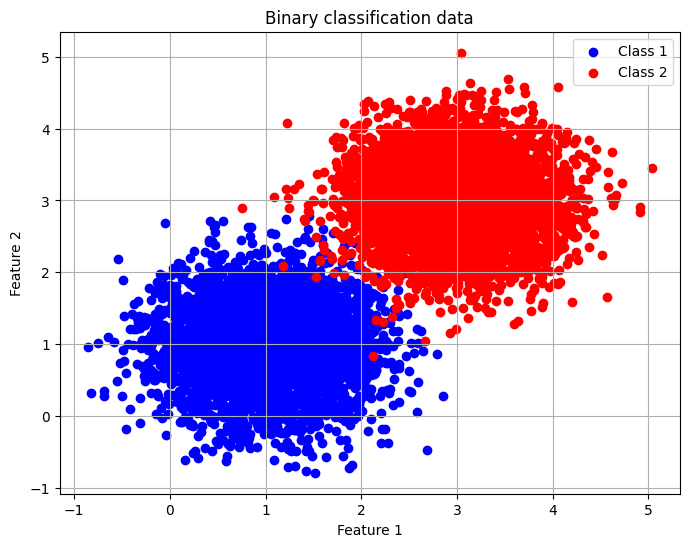

In [2]:
##################################################
#Generating binary classification data (linearly separable)
##################################################
import numpy as np
import matplotlib.pyplot as plt

mean1 = [1,1]
mean2 = [3,3]
cov = [[0.3,0],[0,0.3]]
class1_tr = np.random.multivariate_normal(mean1, cov, size=(4500))
class2_tr = np.random.multivariate_normal(mean2, cov, size=(4500))

tr_data = np.concatenate([class1_tr, class2_tr], axis=0)
tr_targets = np.concatenate([np.zeros(len(class1_tr)), np.ones(len(class2_tr))])

class1_te = np.random.multivariate_normal(mean1, cov, size=(500))
class2_te = np.random.multivariate_normal(mean2, cov, size=(500))

te_data = np.concatenate([class1_te, class2_te], axis=0)
te_targets = np.concatenate([np.zeros(len(class1_te)), np.ones(len(class2_te))])

# Plot the data
plt.figure(figsize=(8, 6))
plt.scatter(class1_tr[:, 0], class1_tr[:, 1], color='blue', label='Class 1')
plt.scatter(class2_tr[:, 0], class2_tr[:, 1], color='red', label='Class 2')
plt.xlabel('Feature 1')
plt.ylabel('Feature 2')
plt.title('Binary classification data')
plt.legend()
plt.grid(True)
plt.show()


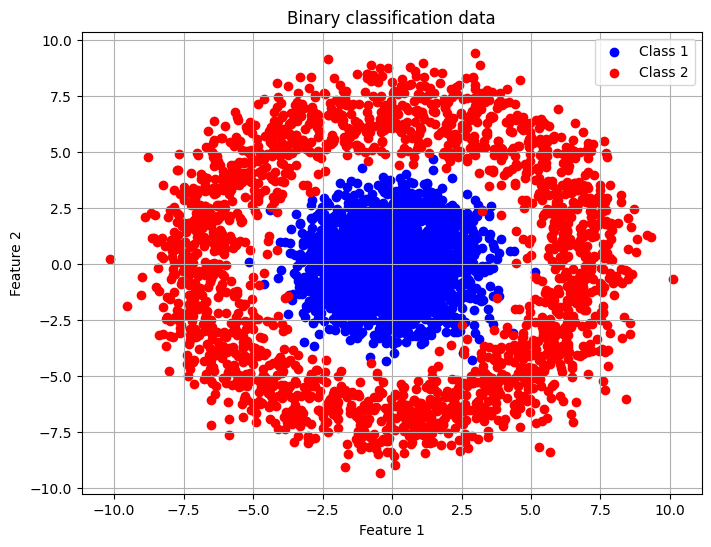

In [3]:
##################################################
#Generating binary classification data (non-linearly separable)
##################################################
import numpy as np
import matplotlib.pyplot as plt

# Function to generate data for concentric circles
def generate_concentric_data(n_samples, radius1,radius2, noise_std):
    # Generate random angles
    angles = np.random.rand(n_samples) * 2 * np.pi
    noise = noise_std*np.random.randn(n_samples)
    # Generate inner and outer circles
    inner_circle = np.array([(radius1 + noise) * np.cos(angles), (radius1 + noise) * np.sin(angles)]).T
    outer_circle = np.array([(radius2 + noise) * np.cos(angles), (radius2 + noise) * np.sin(angles)]).T
    return inner_circle, outer_circle

# Generate data for two classes
n_samples = 2000  # Number of samples for each class
radius1 = 2  # Radius of inner circle
radius2 = 7  # Radius of inner circle
noise_std = 1   # Noise to be added to radius

class1_data, class2_data = generate_concentric_data(n_samples, radius1,radius2,noise_std)

# Plot the data
plt.figure(figsize=(8, 6))
plt.scatter(class1_data[:, 0], class1_data[:, 1], color='blue', label='Class 1')
plt.scatter(class2_data[:, 0], class2_data[:, 1], color='red', label='Class 2')
plt.xlabel('Feature 1')
plt.ylabel('Feature 2')
plt.title('Binary classification data')
plt.legend()
plt.grid(True)
plt.show()



<ipython-input-49-bd8d2a52398b>:20: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  R[i,j] = y[i] * (1 - y[i])


Accuracy:  0.997


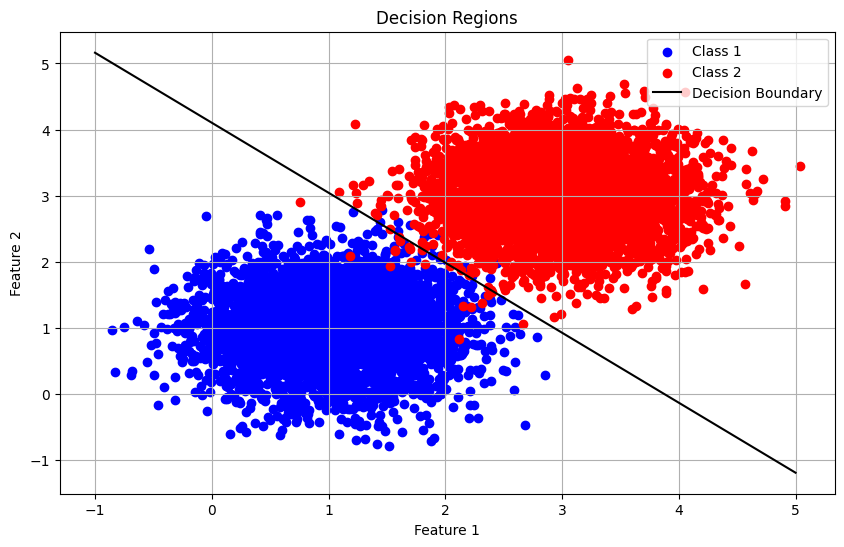

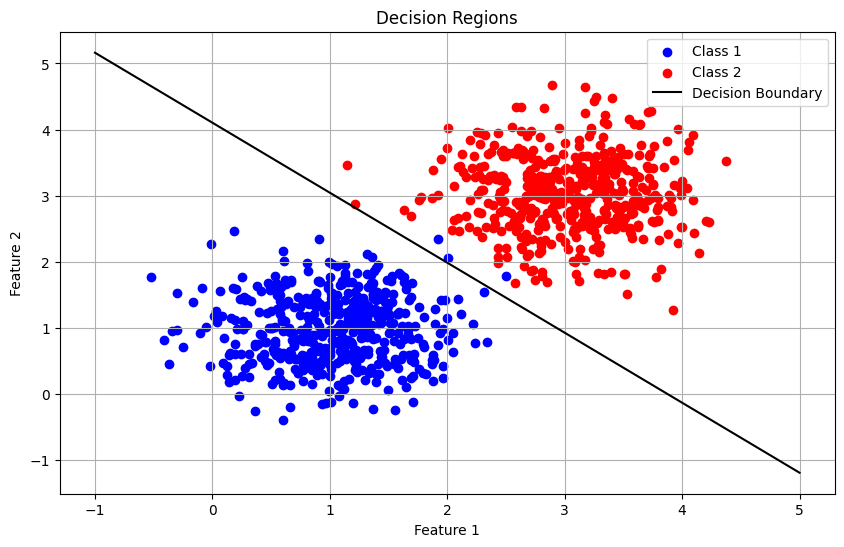

In [49]:
##################################################
#Classify the linearly separable data using linear classification models
##################################################
def Logistic_Regression(training_data, training_label, testing_data):

  tolerance = 0.01
  # Initialize weights with random values
  weights = np.random.randn(training_data.shape[1], 1)
  y = training_data @ weights
  y = 1 / (1 + np.exp(-y))
  k = 0
  g = training_data.T @ (y - training_label)
  while (np.linalg.norm(g) > tolerance and k < 1000):
    y = training_data @ weights
    y = 1 / (1 + np.exp(-y - 1e-5))
    R = np.zeros((len(y),len(y)))
    i = 0
    j = 0
    while((i < len(y)) and (j < len(y))):
      R[i,j] = y[i] * (1 - y[i])
      i += 1
      j += 1

    h = training_data.T @ R @ training_data
    g = training_data.T @ (y - training_label)
    I = np.eye(h.shape[0])
    delta = np.linalg.inv(h + 1e-5*I) @ g
    weights = weights - delta
    k += 1

  return weights

ones = np.ones((tr_data.shape[0], 1))
tr_data1 = np.concatenate((ones, tr_data), axis=1)
ones = np.ones((te_data.shape[0], 1))
te_data1 = np.concatenate((ones, te_data), axis=1)
tr_targets1 = tr_targets.reshape((len(tr_targets),1))
weights = Logistic_Regression(tr_data1, tr_targets1, te_data1)
tr_targets = tr_targets.reshape(len(tr_targets))

def accuracy(predictions, targets):
  predictions = [0 if prediction < 0 else 1 for prediction in predictions]
  return np.mean(predictions == targets)

acc = accuracy(te_data1 @ weights,te_targets)
print("Accuracy: ", acc)

def plot_decision_regions(training_data, training_label,weights):

    x = np.linspace(-1, 5, 100)
    def boundary(w,x):
      return (-w[1] / w[2] )*x - (w[0] / w[2])

    y = boundary(weights,x)
    class1_data = training_data[training_label == 0]
    class2_data = training_data[training_label == 1]
    plt.figure(figsize=(10, 6))
    plt.scatter(class1_data[:, 0], class1_data[:, 1], color='blue', label='Class 1')
    plt.scatter(class2_data[:, 0], class2_data[:, 1], color='red', label='Class 2')
    plt.plot(x,y,color = 'black', label = 'Decision Boundary')
    plt.xlabel('Feature 1')
    plt.ylabel('Feature 2')
    plt.title('Decision Regions')
    plt.legend()
    plt.grid(True)
    plt.show()

plot_decision_regions(tr_data, tr_targets,weights)
plot_decision_regions(te_data, te_targets,weights)

In [58]:
##################################################
#Classify the linearly separable data using deep neural based classification models
##################################################
def sigmoid(a):
  return 1 / (1 + np.exp(-a - 1e-6))

def ReLu(a):
  return np.maximum(0,a)

def gradReLu(inp):
  outp = np.where(inp > 0, 1,0)
  return outp

def fwdPropagate(inputs, weights,activation_fun = ReLu):
  #Inputs: input data, paramters of network
  W1, W2, W3 = weights
  z1 = inputs @ W1.T
  a = activation_fun(z1)

  z2 = a @ W2.T
  a = activation_fun(z2)

  z3 = a @ W3.T
  targets = sigmoid(z3)

  activations = (z1,z2)
  outps = (targets, activations)
  #Return the requires outputs, i.e., final output and intermediate activations
  return outps

def computeGradients(inputs, targets, weights, activations,activation_fun,grad_activation_fun = gradReLu):
  #Inputs: input data, targets, parameters of netwrok, intermediate activations

  #Compute the loss
  z1,z2 = activations
  W1,W2,W3 = weights
  a = activation_fun(z2)
  z3 = a @ W3.T
  predictions = sigmoid(z3)
  #loss = -np.sum(targets * np.log(predictions + 1e-5)) / len(inputs)

  #Compute the gradients
  dj_dw3 = np.zeros_like(W3)
  dj_dw2 = np.zeros_like(W2)
  dj_dw1 = np.zeros_like(W1)

  m = len(inputs)
  if len(predictions):
    #loss = -np.sum(np.log(predictions[np.arange(len(inputs)),targets])) / len(inputs)
    #Compote the derivative of loss at parameters
    delta3 = targets - predictions
    dj_dw3 = np.dot(delta3.T, z2) / m
    delta2 = np.dot(delta3, W3) * grad_activation_fun(z2)
    dj_dw2 = np.dot(delta2.T, activation_fun(z1)) / m
    delta1 = np.dot(delta2, W2) * grad_activation_fun(z1)
    dj_dw1 = np.dot(delta1.T, inputs.reshape(-1, 2)) / m

  #Return the gradients
  return [dj_dw1, dj_dw2, dj_dw3]

def applyGradients(weights, gradients, learning_rate, adam = False):
  #Inputs: weights, gradients, and learning rate
  W1, W2, W3 = weights
  dj_dw1, dj_dw2, dj_dw3 = gradients

  if adam:
    beta1 = 0.9
    beta2 = 0.999
    epsilon = 1e-8
    t = 1
    m1 = np.zeros_like(W1)
    v1 = np.zeros_like(W1)
    m2 = np.zeros_like(W2)
    v2 = np.zeros_like(W2)
    m3 = np.zeros_like(W3)
    v3 = np.zeros_like(W3)

    m1 = beta1 * m1 + (1 - beta1) * dj_dw1
    v1 = beta2 * v1 + (1 - beta2) * (dj_dw1 ** 2)
    m2 = beta1 * m2 + (1 - beta1) * dj_dw2
    v2 = beta2 * v2 + (1 - beta2) * (dj_dw2 ** 2)
    m3 = beta1 * m3 + (1 - beta1) * dj_dw3
    v3 = beta2 * v3 + (1 - beta2) * (dj_dw3 ** 2)

    m1_hat = m1 / (1 - beta1 ** t)
    v1_hat = v1 / (1 - beta2 ** t)
    m2_hat = m2 / (1 - beta1 ** t)
    v2_hat = v2 / (1 - beta2 ** t)
    m3_hat = m3 / (1 - beta1 ** t)
    v3_hat = v3 / (1 - beta2 ** t)

    W1 -= learning_rate * m1_hat / (np.sqrt(v1_hat) + epsilon)
    W2 -= learning_rate * m2_hat / (np.sqrt(v2_hat) + epsilon)
    W3 -= learning_rate * m3_hat / (np.sqrt(v3_hat) + epsilon)

    return [W1, W2, W3]

  W1 -= learning_rate*dj_dw1
  W2 -= learning_rate*dj_dw2
  W3 -= learning_rate*dj_dw3

  #Return the updated parameters
  return [W1, W2, W3]

#Complete the below function to complete the backpropagation ste
def backPropagate(inputs, targets, weights, activations, learning_rate,activation_fun = ReLu,grad_activation_fun = gradReLu,adam = False):
  #Inputs: input data, targets, parameters of network, intermediate activations, learning rate of optimization algorithm

  #Compute the gradients
  gradients = computeGradients(inputs,targets,weights,activations,activation_fun,grad_activation_fun = gradReLu)
  #Update the paramters using gradients
  weights = applyGradients(weights,gradients,learning_rate,adam)
  #Return the updated parameters
  return weights

def training(inputs, targets_idx,activation_fun = ReLu,grad_activation_fun = gradReLu ,adam = False,batch_size = 100, epochs=50, train_val_split=0.8, learning_rate=0.01):

  #Set the hyperparameters
  hidden_units = 3
  n_classes = 1
  n_samples = len(inputs)
  n_batches = n_samples // batch_size

  permutation = np.random.permutation(inputs.shape[0])
  inputs = inputs[permutation]
  targets_idx = targets_idx[permutation]
  #Split the training data into two parts.
  #Use 90 percent of training data for training the network.
  #Remaining 10 percent as validation data
  index = int(train_val_split*n_samples)
  training_data = inputs[:index]
  training_targets = targets_idx[:index]
  validation_data = inputs[index:]
  validation_targets = targets_idx[index:]

  #Randomly initialize the weights
  W1 = np.random.randn(hidden_units,inputs.shape[1])*0.001
  W2 = np.random.randn(hidden_units, hidden_units)*0.001
  W3 = np.random.randn(n_classes,hidden_units)*0.001
  weights = [W1,W2,W3]
  #Interate for epochs times
  for epoch in range(epochs):
    #Shuffle the training data
    permutation = np.random.permutation(training_data.shape[0])
    train_data_shuffled = training_data[permutation]
    train_targets_shuffled = training_targets[permutation]

    #Interate through the batches of data
    for batch in range(n_batches + 1):
      #Get the batch of data
      start = batch*batch_size
      end = min(start + batch_size, n_samples)
      batch_inputs = train_data_shuffled[start:end]
      batch_targets = train_targets_shuffled[start:end]

      #Forward propagation
      predictions,activations = fwdPropagate(batch_inputs, weights, activation_fun)

      #Backward propagation
      weights = backPropagate(batch_inputs, batch_targets, weights, activations, learning_rate, grad_activation_fun, adam)

    #Compute outpus on trianing data
    predictions,_ = fwdPropagate(training_data,weights)
    train_predictions = np.array([0 if prediction > 0.5 else 1 for prediction in predictions])
    training_targets = training_targets.reshape(len(training_targets))
    #Compute training accuracy, and training error
    train_accuracy = np.mean(train_predictions == training_targets)
    train_loss = -np.sum(training_targets * np.log(predictions + 1e-5)) / len(training_data)
    training_targets = training_targets.reshape((len(training_targets),1))

    #Compute outputs on validation data
    val_outputs, _ = fwdPropagate(validation_data, weights)
    val_predictions = np.array([0 if prediction > 0.5 else 1 for prediction in val_outputs])
    validation_targets = validation_targets.reshape(len(validation_targets))
    #Compute validation accuracy, and validation error
    val_accuracy = np.mean(val_predictions == validation_targets)
    val_loss = -np.sum(validation_targets * np.log(val_outputs + 1e-5)) /  len(validation_data)

    #Print the statistics of training, i.e., training error, training accuracy, validation error, and validation accuracy
    print(f"Epoch {epoch + 1}/{epochs}:")
    print(f"  Training Loss: {train_loss:.4f} - Training Accuracy: {train_accuracy:.4f}")
    print(f"  Validation Loss: {val_loss:.4f} - Validation Accuracy: {val_accuracy:.4f}")

    #Save the parameters of network
  return weights

tr_targets1 = tr_targets.reshape((len(tr_targets),1))
weights = training(tr_data,tr_targets1)


Epoch 1/50:
  Training Loss: 2505.6529 - Training Accuracy: 0.4979
  Validation Loss: 613.4171 - Validation Accuracy: 0.5083
Epoch 2/50:
  Training Loss: 2505.6529 - Training Accuracy: 0.4979
  Validation Loss: 613.4171 - Validation Accuracy: 0.5083
Epoch 3/50:
  Training Loss: 2505.6529 - Training Accuracy: 0.4979
  Validation Loss: 613.4171 - Validation Accuracy: 0.5083
Epoch 4/50:
  Training Loss: 2505.6529 - Training Accuracy: 0.4979
  Validation Loss: 613.4171 - Validation Accuracy: 0.5083
Epoch 5/50:
  Training Loss: 2505.6530 - Training Accuracy: 0.4979
  Validation Loss: 613.4171 - Validation Accuracy: 0.5083
Epoch 6/50:
  Training Loss: 2505.6530 - Training Accuracy: 0.4979
  Validation Loss: 613.4171 - Validation Accuracy: 0.5083
Epoch 7/50:
  Training Loss: 2505.6530 - Training Accuracy: 0.4979
  Validation Loss: 613.4171 - Validation Accuracy: 0.5083
Epoch 8/50:
  Training Loss: 2505.6530 - Training Accuracy: 0.4979
  Validation Loss: 613.4171 - Validation Accuracy: 0.5083


<ipython-input-49-bd8d2a52398b>:20: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  R[i,j] = y[i] * (1 - y[i])
<ipython-input-49-bd8d2a52398b>:15: RuntimeWarning: overflow encountered in exp
  y = 1 / (1 + np.exp(-y - 1e-5))


Accuracy:  0.495


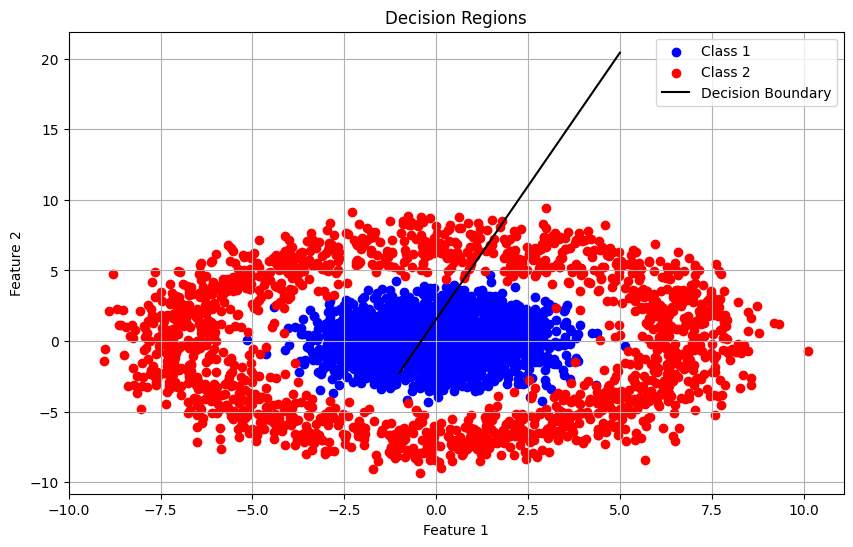

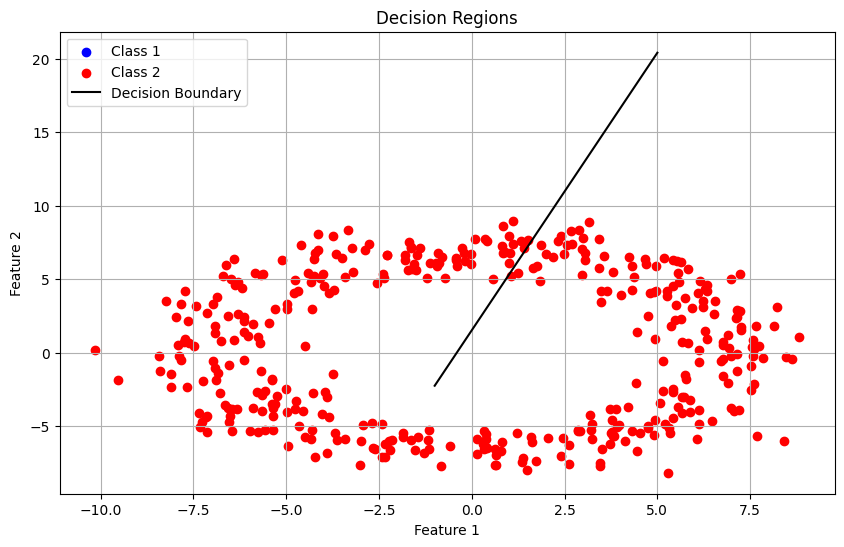

In [54]:
##################################################
#Classify the non-linearly separable data using linear classification models
##################################################
dataset = np.concatenate([class1_data, class2_data], axis=0)
targets = np.concatenate([np.zeros(len(class1_data)), np.ones(len(class2_data))])

train_test_split = 0.9
index = int(train_test_split*len(dataset))
training_data = dataset[:index]
training_targets = targets[:index]
test_data = dataset[index:]
test_targets = targets[index:]

ones = np.ones((training_data.shape[0], 1))
tr_data1 = np.concatenate((ones, training_data), axis=1)
ones = np.ones((test_data.shape[0], 1))
te_data1 = np.concatenate((ones, test_data), axis=1)
training_targets = training_targets.reshape((len(training_targets),1))
weights = Logistic_Regression(tr_data1, training_targets, te_data1)
training_targets = training_targets.reshape(len(training_targets))

acc = accuracy(te_data1 @ weights,test_targets)
print("Accuracy: ", acc)

plot_decision_regions(training_data, training_targets,weights)
plot_decision_regions(test_data, test_targets,weights)

In [62]:
##################################################
#Classify the non-linearly separable data using deep neural based classification models
##################################################
dataset = np.concatenate([class1_data, class2_data], axis=0)
targets = np.concatenate([np.zeros(len(class1_data)), np.ones(len(class2_data))])

permutation = np.random.permutation(dataset.shape[0])
dataset = dataset[permutation]
targets = targets[permutation]

train_test_split = 0.9
index = int(train_test_split*len(dataset))
training_data = dataset[:index]
training_targets = targets[:index]
test_data = dataset[index:]
test_targets = targets[index:]

training_targets = training_targets.reshape((len(training_targets),1))
weights = training(training_data,training_targets)

predictions,_ = fwdPropagate(test_data,weights)
test_predictions = np.array([0 if prediction > 0.5 else 1 for prediction in predictions])
test_targets = test_targets.reshape(len(test_targets))
acc = np.mean(test_predictions == test_targets)
print("Accuracy: ", acc)

Epoch 1/50:
  Training Loss: 1002.2612 - Training Accuracy: 0.4979
  Validation Loss: 242.5943 - Validation Accuracy: 0.5139
Epoch 2/50:
  Training Loss: 1002.2612 - Training Accuracy: 0.4979
  Validation Loss: 242.5943 - Validation Accuracy: 0.5139
Epoch 3/50:
  Training Loss: 1002.2612 - Training Accuracy: 0.4979
  Validation Loss: 242.5943 - Validation Accuracy: 0.5139
Epoch 4/50:
  Training Loss: 1002.2612 - Training Accuracy: 0.4979
  Validation Loss: 242.5943 - Validation Accuracy: 0.5139
Epoch 5/50:
  Training Loss: 1002.2612 - Training Accuracy: 0.4979
  Validation Loss: 242.5943 - Validation Accuracy: 0.5139
Epoch 6/50:
  Training Loss: 1002.2612 - Training Accuracy: 0.4979
  Validation Loss: 242.5943 - Validation Accuracy: 0.5139
Epoch 7/50:
  Training Loss: 1002.2612 - Training Accuracy: 0.4979
  Validation Loss: 242.5943 - Validation Accuracy: 0.5139
Epoch 8/50:
  Training Loss: 1002.2612 - Training Accuracy: 0.4979
  Validation Loss: 242.5943 - Validation Accuracy: 0.5139


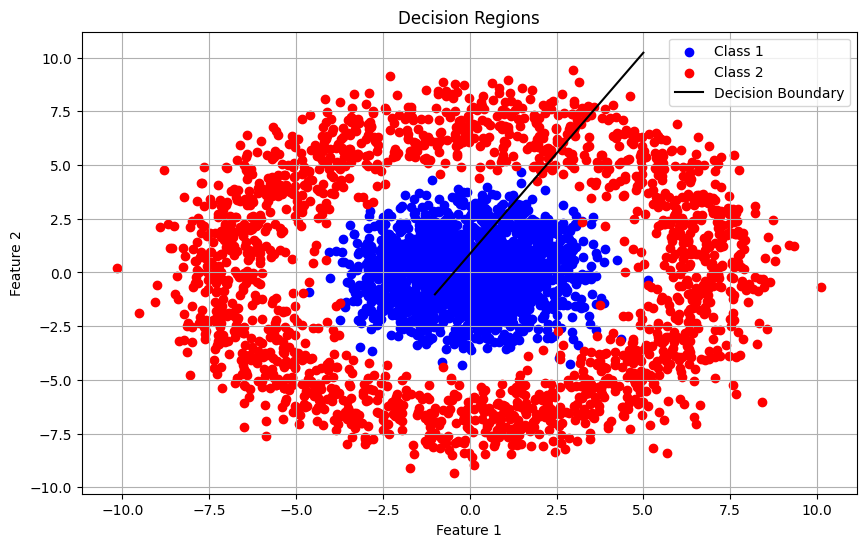

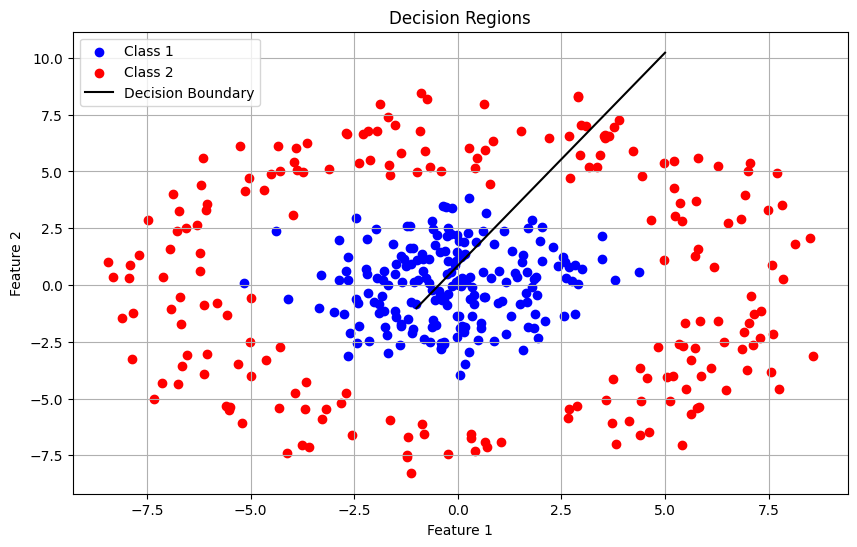

In [68]:
training_targets = training_targets.reshape(len(training_targets))
plot_decision_regions(training_data, training_targets,weights[2][0])
plot_decision_regions(test_data, test_targets,weights[2][0])

<b> Report your observations </b>

1.

2.

3.

